In [1]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
df2 = pd.read_csv(r"C:\Users\rauna\codes\datasets\flood.csv")

In [3]:
df2

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,3,7,4,7,5,9,4,6,10,4,...,7,3,8,8,6,1,5,4,2,0.535
49996,3,10,3,8,3,3,4,4,3,11,...,8,6,3,6,4,4,2,4,5,0.510
49997,4,4,5,7,2,1,4,5,6,7,...,4,6,4,1,5,1,6,4,3,0.430
49998,4,5,4,4,6,3,10,2,6,11,...,6,3,4,7,6,2,4,0,11,0.515


In [4]:
# Analyze flood dataset with regularized regression models
print("Dataset shape:", df2.shape)
print("\nColumn names:")
print(df2.columns.tolist())
print("\nData info:")
df2.info()
print("\nBasic statistics:")
print(df2.describe())


Dataset shape: (50000, 21)

Column names:
['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement', 'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality', 'Siltation', 'AgriculturalPractices', 'Encroachments', 'IneffectiveDisasterPreparedness', 'DrainageSystems', 'CoastalVulnerability', 'Landslides', 'Watersheds', 'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss', 'InadequatePlanning', 'PoliticalFactors', 'FloodProbability']

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-nu

In [5]:

# Check for missing values
print("\nMissing values:")
print(df2.isnull().sum())



Missing values:
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64


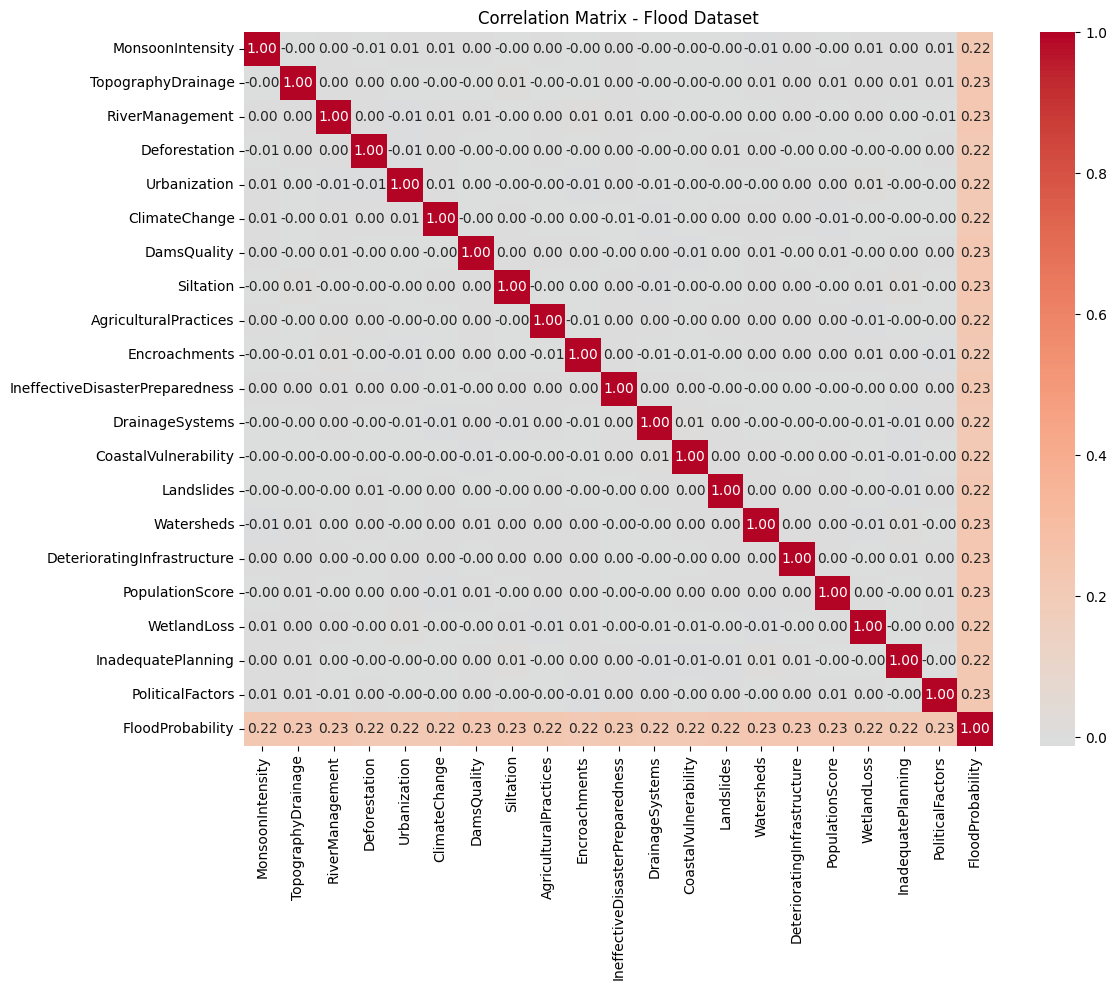

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
# Visualize correlations
plt.figure(figsize=(12,10))
sns.heatmap(df2.corr(), annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Matrix - Flood Dataset")
plt.tight_layout()
plt.show()


In [7]:
df2.corr()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
MonsoonIntensity,1.000000,-0.003470,0.002247,-0.005384,0.005092,0.005959,0.002790,-0.003191,0.002723,-0.003723,...,-0.000118,-0.004600,-0.002315,-0.008859,0.001763,-0.003597,0.005938,0.003455,0.005402,0.224081
TopographyDrainage,-0.003470,1.000000,0.002492,0.002046,0.000116,-0.002288,-0.004472,0.010675,-0.004550,-0.007272,...,-0.001608,-0.000717,-0.002040,0.005312,0.003654,0.005887,0.003515,0.005276,0.008191,0.229414
RiverManagement,0.002247,0.002492,1.000000,0.004808,-0.009651,0.007199,0.007697,-0.000389,0.003635,0.009253,...,0.002171,-0.000111,-0.004339,0.000097,0.000604,-0.001382,0.002012,0.000364,-0.006323,0.228917
Deforestation,-0.005384,0.002046,0.004808,1.000000,-0.011325,0.000517,-0.000728,-0.000823,0.002929,-0.003507,...,-0.001060,-0.003019,0.005258,0.002171,-0.002093,0.000138,-0.000718,-0.001108,0.001242,0.220237
Urbanization,0.005092,0.000116,-0.009651,-0.011325,1.000000,0.007478,0.000268,-0.001287,-0.001391,-0.011386,...,-0.005281,-0.000881,-0.000651,-0.003479,0.004222,0.002154,0.013263,-0.000864,-0.002418,0.220867
ClimateChange,0.005959,-0.002288,0.007199,0.000517,0.007478,1.000000,-0.002889,0.001514,-0.003362,0.000075,...,-0.007587,-0.001467,0.000689,0.003023,0.003281,-0.008334,-0.000547,-0.000186,-0.004453,0.220986
DamsQuality,0.002790,-0.004472,0.007697,-0.000728,0.000268,-0.002889,1.000000,0.003239,0.001743,0.001638,...,0.004165,-0.009503,0.000436,0.005322,-0.004001,0.006856,-0.000662,0.001535,0.001699,0.227467
Siltation,-0.003191,0.010675,-0.000389,-0.000823,-0.001287,0.001514,0.003239,1.000000,-0.003911,0.000158,...,-0.008296,-0.003564,-0.001866,0.003682,0.003045,-0.002484,0.007903,0.011918,-0.001597,0.226544
AgriculturalPractices,0.002723,-0.004550,0.003635,0.002929,-0.001391,-0.003362,0.001743,-0.003911,1.000000,-0.006564,...,0.000648,-0.003708,0.004142,0.004371,0.003248,0.001678,-0.007963,-0.002221,-0.001280,0.221846
Encroachments,-0.003723,-0.007272,0.009253,-0.003507,-0.011386,0.000075,0.001638,0.000158,-0.006564,1.000000,...,-0.005960,-0.006591,-0.003032,0.003679,0.002774,0.003874,0.005706,0.001380,-0.007547,0.218259


In [8]:

# Identify target column (you may need to adjust this based on your dataset)
# Common target names: 'FloodProbability', 'Flood', 'WaterLevel', etc.
print("\nColumns in dataset:")
for col in df2.columns:
    print(f"  - {col}")

# Assuming the last column is the target (adjust if needed)
target_col = df2.columns[-1]  # or specify explicitly like 'FloodProbability'
print(f"\nUsing '{target_col}' as target variable")

# Handle missing values
df2_clean = df2.dropna()
print(f"\nRows after dropping missing: {len(df2_clean)} (dropped {len(df2) - len(df2_clean)})")



Columns in dataset:
  - MonsoonIntensity
  - TopographyDrainage
  - RiverManagement
  - Deforestation
  - Urbanization
  - ClimateChange
  - DamsQuality
  - Siltation
  - AgriculturalPractices
  - Encroachments
  - IneffectiveDisasterPreparedness
  - DrainageSystems
  - CoastalVulnerability
  - Landslides
  - Watersheds
  - DeterioratingInfrastructure
  - PopulationScore
  - WetlandLoss
  - InadequatePlanning
  - PoliticalFactors
  - FloodProbability

Using 'FloodProbability' as target variable

Rows after dropping missing: 50000 (dropped 0)


In [9]:
# Prepare features and target
X = df2_clean.drop(columns=[target_col])
y = df2_clean[target_col]

# Handle categorical variables if any
categorical_cols = X.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    print(f"\nCategorical columns found: {categorical_cols.tolist()}")
    X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
    print(f"Features after encoding: {X.shape[1]}")

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)
print(f"\nTrain size: {len(X_train)}, Test size: {len(X_test)}")



Train size: 35000, Test size: 15000


In [10]:

from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Ridge
ridge = Ridge(alpha=0.1)  
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge (alpha=0.1) | RMSE={rmse_ridge} | R²={r2_ridge}")

# Lasso
lasso = Lasso(alpha=0.01, max_iter=10000)  
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Lasso (alpha=0.01) | RMSE={rmse_lasso} | R²={r2_lasso}")

# ElasticNet
elastic = ElasticNet(alpha=0.01, l1_ratio=0.3, max_iter=10000)  
elastic.fit(X_train, y_train)
y_pred_elastic = elastic.predict(X_test)
rmse_elastic = np.sqrt(mean_squared_error(y_test, y_pred_elastic))
r2_elastic = r2_score(y_test, y_pred_elastic)
print(f"ElasticNet (alpha=0.01) | RMSE={rmse_elastic} | R²={r2_elastic}")

# Summary
print("\n" + "="*50)
print("RESULTS SUMMARY")
print("="*50)
results = pd.DataFrame({
    'Model': ['Ridge', 'Lasso', 'ElasticNet'],
    'RMSE': [rmse_ridge, rmse_lasso, rmse_elastic],
    'R²': [r2_ridge, r2_lasso, r2_elastic],
    'Non-zero Coefs': [
        np.sum(np.abs(ridge.coef_) > 1e-5),
        np.sum(np.abs(lasso.coef_) > 1e-5),
        np.sum(np.abs(elastic.coef_) > 1e-5)
    ]
})
print(results)


Ridge (alpha=0.1) | RMSE=1.440309576103755e-07 | R²=0.9999999999917876
Lasso (alpha=0.01) | RMSE=0.04510106609639845 | R²=0.19474108573738957
ElasticNet (alpha=0.01) | RMSE=0.013786320036705333 | R²=0.9247582933825935

RESULTS SUMMARY
        Model          RMSE        R²  Non-zero Coefs
0       Ridge  1.440310e-07  1.000000              20
1       Lasso  4.510107e-02  0.194741              20
2  ElasticNet  1.378632e-02  0.924758              20


In [11]:
results

,Model,RMSE,R²,Non-zero Coefs
0,Ridge,1.440310e-07,1.000000,20
1,Lasso,4.510107e-02,0.194741,20
2,ElasticNet,1.378632e-02,0.924758,20


In [12]:
# flood_elasticnet_analysis.py
# Requirements: numpy, pandas, scikit-learn, statsmodels, matplotlib, seaborn
# pip install numpy pandas scikit-learn statsmodels matplotlib seaborn

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# 1) Load data
df = df2   # ensure flood.csv is in working dir
print("Data shape:", df.shape)
print("Columns:", df.columns.tolist())

# 2) Define X, y
y = df['FloodProbability'].astype(float)
X = df.drop(columns=['FloodProbability'])
feature_names = X.columns.tolist()
print("\nPredictors count:", len(feature_names))

# 3) Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# 4) Scale features for regularized models
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# Helper to print model metrics and coefficients
def evaluate_model(name, model, Xtr, Xte, ytr, yte, scaled=True):
    model.fit(Xtr, ytr)
    ypred = model.predict(Xte)
    rmse = mean_squared_error(yte, ypred, squared=False)
    r2 = r2_score(yte, ypred)
    if scaled:
        coefs = model.coef_
        # Map coefficients back to feature names (coeff = change in y per 1 SD increase in X)
        coef_df = pd.DataFrame({'feature': feature_names, 'coef_std': coefs})
    else:
        coef_df = pd.DataFrame({'feature': feature_names, 'coef': model.coef_})
    return {'name': name, 'model': model, 'rmse': rmse, 'r2': r2, 'coef_df': coef_df, 'ypred': ypred}

# 5) Fit models
# OLS (no regularization) — use statsmodels on unscaled X for coefficients in original units
ols = LinearRegression()
ols_res = evaluate_model("OLS (LinearRegression)", ols, X_train, X_test, y_train, y_test, scaled=False)

# RidgeCV (on scaled data)
alphas_ridge = np.logspace(-6, 2, 50)
ridge_cv = RidgeCV(alphas=alphas_ridge, cv=5)
ridge_res = evaluate_model("RidgeCV", ridge_cv, X_train_s, X_test_s, y_train, y_test, scaled=True)

# LassoCV (on scaled data)
lasso_cv = LassoCV(cv=5, n_alphas=100, random_state=0, max_iter=10000)
lasso_res = evaluate_model("LassoCV", lasso_cv, X_train_s, X_test_s, y_train, y_test, scaled=True)

# ElasticNetCV (on scaled data) — searches alphas and l1_ratio
l1_ratios = np.linspace(0.1, 1.0, 11)
elastic_cv = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=5, random_state=0, max_iter=10000)
elastic_res = evaluate_model("ElasticNetCV", elastic_cv, X_train_s, X_test_s, y_train, y_test, scaled=True)

# 6) Summarize numeric results
results = []
for r in [ols_res, ridge_res, lasso_res, elastic_res]:
    results.append({'Model': r['name'], 'RMSE': r['rmse'], 'R2': r['r2'], 
                    'NonzeroCoefs': (r['coef_df']['coef_std'] if 'coef_std' in r['coef_df'].columns else r['coef_df']['coef']).astype(float).map(lambda v: abs(v)>1e-12).sum()})
res_df = pd.DataFrame(results)
print("\n=== Model performance summary ===")
print(res_df)

# 7) Coefficients: ElasticNet (standardized) — top positive & negative
en_coef_df = elastic_res['coef_df'].copy()
en_coef_df['abscoef'] = en_coef_df['coef_std'].abs()
en_coef_df = en_coef_df.sort_values('abscoef', ascending=False).drop(columns='abscoef')
print("\nElastic Net coefficients (std-scale) — top 10 by magnitude:")
print(en_coef_df.head(10).to_string(index=False))

# Top 5 positive and top 5 negative contributors by Elastic Net
top_pos = en_coef_df.sort_values('coef_std', ascending=False).head(5)
top_neg = en_coef_df.sort_values('coef_std', ascending=True).head(5)
print("\nTop 5 positive contributors (Elastic Net):")
print(top_pos.to_string(index=False))
print("\nTop 5 negative contributors (Elastic Net):")
print(top_neg.to_string(index=False))

# 8) Variables near-zero (threshold)
threshold = 1e-4
near_zero = en_coef_df[en_coef_df['coef_std'].abs() < threshold]['feature'].tolist()
print(f"\nFeatures with near-zero Elastic Net coefficient (abs < {threshold}):", near_zero)

# 9) For business Q2: marginal effect estimates for key controllable variables
controllable = ['DamsQuality', 'DrainageSystems', 'Deforestation', 'Urbanization']  # modify if names differ
for var in controllable:
    if var not in feature_names:
        print(f"Warning: {var} not in features. Available features: {feature_names}")
        continue
    # compute predicted floodprob at 10th and 90th percentile of var, others at median
    X_med = X.median()
    p10 = X[var].quantile(0.10)
    p90 = X[var].quantile(0.90)
    X_base = X_med.copy()
    X_low = X_base.copy(); X_low[var] = p10
    X_high = X_base.copy(); X_high[var] = p90
    # scale
    X_base_s = scaler.transform(pd.DataFrame([X_base])) 
    X_low_s = scaler.transform(pd.DataFrame([X_low]))
    X_high_s = scaler.transform(pd.DataFrame([X_high]))
    pred_base = elastic_res['model'].predict(X_base_s)[0]
    pred_low = elastic_res['model'].predict(X_low_s)[0]
    pred_high = elastic_res['model'].predict(X_high_s)[0]
    print(f"\nMarginal effect ({var}): 10th -> 90th pct change in predicted FloodProbability = {pred_high - pred_low:.6f}")
    print(f"Predicted @10pct: {pred_low:.6f}, @median: {pred_base:.6f}, @90pct: {pred_high:.6f}")

# 10) Cross-validated RMSE (5-fold) for stability
kf = KFold(n_splits=5, shuffle=True, random_state=0)
def cv_rmse(model, Xs, ys):
    scores = -cross_val_score(model, Xs, ys, cv=kf, scoring='neg_root_mean_squared_error', n_jobs=1)
    return scores.mean(), scores.std()

print("\nCross-validated RMSEs (mean ± std):")
print("ElasticNetCV:", cv_rmse(elastic_res['model'], X_train_s, y_train))
print("LassoCV:", cv_rmse(lasso_res['model'], X_train_s, y_train))
print("RidgeCV:", cv_rmse(ridge_res['model'], X_train_s, y_train))


Data shape: (50000, 21)
Columns: ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement', 'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality', 'Siltation', 'AgriculturalPractices', 'Encroachments', 'IneffectiveDisasterPreparedness', 'DrainageSystems', 'CoastalVulnerability', 'Landslides', 'Watersheds', 'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss', 'InadequatePlanning', 'PoliticalFactors', 'FloodProbability']

Predictors count: 20


c:\Users\rauna\codes\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\rauna\codes\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\rauna\codes\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\rauna\codes\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use 


=== Model performance summary ===
                    Model          RMSE        R2  NonzeroCoefs
0  OLS (LinearRegression)  3.331719e-16  1.000000            20
1                 RidgeCV  1.244445e-12  1.000000            20
2                 LassoCV  5.164948e-05  0.999999            20
3            ElasticNetCV  5.164948e-05  0.999999            20

Elastic Net coefficients (std-scale) — top 10 by magnitude:
              feature  coef_std
   TopographyDrainage  0.011233
     PoliticalFactors  0.011231
          DamsQuality  0.011202
 CoastalVulnerability  0.011202
AgriculturalPractices  0.011194
      PopulationScore  0.011192
      DrainageSystems  0.011187
         Urbanization  0.011181
     MonsoonIntensity  0.011161
            Siltation  0.011160

Top 5 positive contributors (Elastic Net):
              feature  coef_std
   TopographyDrainage  0.011233
     PoliticalFactors  0.011231
          DamsQuality  0.011202
 CoastalVulnerability  0.011202
AgriculturalPractices  0.011

In [13]:
# ...existing code...
en_coef_df = elastic_res['coef_df'].copy()
en_coef_df['abscoef'] = en_coef_df['coef_std'].abs()
en_coef_df['sign'] = np.where(en_coef_df['coef_std'] > 0, 'positive',
                              np.where(en_coef_df['coef_std'] < 0, 'negative', 'zero'))
en_coef_df = en_coef_df.sort_values('abscoef', ascending=False)

print("\nElastic Net coefficients (std-scale) — top 10 by magnitude with sign:")
print(en_coef_df[['feature','coef_std','sign']].head(10).to_string(index=False))

top_pos = en_coef_df[en_coef_df['coef_std'] > 0].head(5)
top_neg = en_coef_df[en_coef_df['coef_std'] < 0].head(5)
print("\nTop 5 positive contributors:")
print(top_pos[['feature','coef_std']].to_string(index=False))
print("\nTop 5 negative contributors:")
print(top_neg[['feature','coef_std']].to_string(index=False))

# More practical near-zero threshold
threshold = 1e-3
near_zero = en_coef_df[en_coef_df['abscoef'] < threshold]['feature'].tolist()
print(f"\nFeatures with near-zero Elastic Net coefficient (abs < {threshold}): {near_zero or 'None'}")
# ...existing code...


Elastic Net coefficients (std-scale) — top 10 by magnitude with sign:
              feature  coef_std     sign
   TopographyDrainage  0.011233 positive
     PoliticalFactors  0.011231 positive
          DamsQuality  0.011202 positive
 CoastalVulnerability  0.011202 positive
AgriculturalPractices  0.011194 positive
      PopulationScore  0.011192 positive
      DrainageSystems  0.011187 positive
         Urbanization  0.011181 positive
     MonsoonIntensity  0.011161 positive
            Siltation  0.011160 positive

Top 5 positive contributors:
              feature  coef_std
   TopographyDrainage  0.011233
     PoliticalFactors  0.011231
          DamsQuality  0.011202
 CoastalVulnerability  0.011202
AgriculturalPractices  0.011194

Top 5 negative contributors:
Empty DataFrame
Columns: [feature, coef_std]
Index: []

Features with near-zero Elastic Net coefficient (abs < 0.001): None


In [21]:
# ...existing code...
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Ridge
ridge = Ridge(alpha=0.1)  
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge (alpha=0.1) | RMSE={rmse_ridge} | R²={r2_ridge}")

# Lasso
lasso = Lasso(alpha=0.01, max_iter=10000)  
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Lasso (alpha=0.01) | RMSE={rmse_lasso} | R²={r2_lasso}")

# ElasticNet
elastic = ElasticNet(alpha=0.01, l1_ratio=0.7, max_iter=10000)  
elastic.fit(X_train, y_train)
y_pred_elastic = elastic.predict(X_test)
rmse_elastic = np.sqrt(mean_squared_error(y_test, y_pred_elastic))
r2_elastic = r2_score(y_test, y_pred_elastic)
print(f"ElasticNet (alpha=0.01) | RMSE={rmse_elastic} | R²={r2_elastic}")

# Summary
print("\n" + "="*50)
print("RESULTS SUMMARY")
print("="*50)
results = pd.DataFrame({
    'Model': ['Ridge', 'Lasso', 'ElasticNet'],
    'RMSE': [rmse_ridge, rmse_lasso, rmse_elastic],
    'R²': [r2_ridge, r2_lasso, r2_elastic],
    'Non-zero Coefs': [
        np.sum(np.abs(ridge.coef_) > 1e-5),
        np.sum(np.abs(lasso.coef_) > 1e-5),
        np.sum(np.abs(elastic.coef_) > 1e-5)
    ]
})
print(results)
# ...existing code...
# ...existing code...
# === Added: cell-12 style reporting ===
# Feature names from original (unscaled) X
import builtins  # guard in case 'list' was shadowed
feature_names = X.columns.tolist() if hasattr(X, "columns") else builtins.list(scaler.feature_names_in_)
# ...existing code...
# 7) ElasticNet coefficients on standardized features
en_coef_df = pd.DataFrame({
    'feature': feature_names,
    'coef_std': elastic.coef_
})
en_coef_df['abscoef'] = en_coef_df['coef_std'].abs()
en_coef_df = en_coef_df.sort_values('abscoef', ascending=False).drop(columns='abscoef')

print("\nElastic Net coefficients (std-scale) — top 10 by magnitude:")
print(en_coef_df.head(10).to_string(index=False))

# Top 5 positive and top 5 negative contributors
top_pos = en_coef_df.sort_values('coef_std', ascending=False).head(5)
top_neg = en_coef_df.sort_values('coef_std', ascending=True).head(5)
print("\nTop 5 positive contributors (Elastic Net):")
print(top_pos.to_string(index=False))
print("\nTop 5 negative contributors (Elastic Net):")
print(top_neg.to_string(index=False))

# 8) Variables near-zero (threshold)
threshold = 1e-4
near_zero = en_coef_df[en_coef_df['coef_std'].abs() < threshold]['feature'].tolist()
print(f"\nFeatures with near-zero Elastic Net coefficient (abs < {threshold}):", near_zero)

# 9) Marginal effects for controllable variables (uses unscaled X + scaler)
controllable = ['DamsQuality', 'DrainageSystems', 'Deforestation', 'Urbanization']  # modify if names differ
for var in controllable:
    # ...existing code...
    # Build inputs matching how 'elastic' was trained
    if hasattr(elastic, "feature_names_in_"):
        # Trained with a DataFrame (likely unscaled) -> use DataFrame, no scaler
        X_base_in = pd.DataFrame([X_base], columns=elastic.feature_names_in_)
        X_low_in  = pd.DataFrame([X_low],  columns=elastic.feature_names_in_)
        X_high_in = pd.DataFrame([X_high], columns=elastic.feature_names_in_)
    else:
        # Trained with arrays (scaled pipeline) -> use scaled arrays
        X_base_in = scaler.transform(pd.DataFrame([X_base], columns=feature_names))
        X_low_in  = scaler.transform(pd.DataFrame([X_low],  columns=feature_names))
        X_high_in = scaler.transform(pd.DataFrame([X_high], columns=feature_names))

    pred_base = elastic.predict(X_base_in)[0]
    pred_low  = elastic.predict(X_low_in)[0]
    pred_high = elastic.predict(X_high_in)[0]
    print(f"\nMarginal effect ({var}): 10th -> 90th pct change in predicted FloodProbability = {pred_high - pred_low:.6f}")
    print(f"Predicted @10pct: {pred_low}, @median: {pred_base}, @90pct: {pred_high}")
# ...existing code...
# 10) Cross-validated RMSE (5-fold)
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=0)

def cv_rmse(model, Xs, ys):
    scores = -cross_val_score(model, Xs, ys, cv=kf, scoring='neg_root_mean_squared_error', n_jobs=1)
    return scores.mean(), scores.std()

print("\nCross-validated RMSEs (mean ± std):")
print("ElasticNet:", cv_rmse(elastic, X_train, y_train))
print("Lasso:", cv_rmse(lasso, X_train, y_train))
print("Ridge:", cv_rmse(ridge, X_train, y_train))


Ridge (alpha=0.1) | RMSE=2.4921506515435716e-08 | R²=0.9999999999997506
Lasso (alpha=0.01) | RMSE=0.01993721495707724 | R²=0.8404019852590131
ElasticNet (alpha=0.01) | RMSE=0.013977574128176748 | R²=0.9215555702111627

RESULTS SUMMARY
        Model          RMSE        R²  Non-zero Coefs
0       Ridge  2.492151e-08  1.000000              20
1       Lasso  1.993721e-02  0.840402              20
2  ElasticNet  1.397757e-02  0.921556              20

Elastic Net coefficients (std-scale) — top 10 by magnitude:
                    feature  coef_std
           PoliticalFactors  0.003646
         TopographyDrainage  0.003643
            RiverManagement  0.003643
DeterioratingInfrastructure  0.003637
                DamsQuality  0.003634
            PopulationScore  0.003629
                 Watersheds  0.003629
                 Landslides  0.003617
                  Siltation  0.003615
      AgriculturalPractices  0.003605

Top 5 positive contributors (Elastic Net):
                    featur

In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score

cv = KFold(n_splits=5, shuffle=True, random_state=0)

pipe_ridge = make_pipeline(StandardScaler(), Ridge(alpha=1))
pipe_lasso = make_pipeline(StandardScaler(), Lasso(alpha=0.01, max_iter=10000))
pipe_enet  = make_pipeline(StandardScaler(), ElasticNet(alpha=0.01, l1_ratio=0.4, max_iter=10000))

print("CV R² (Ridge):",  cross_val_score(pipe_ridge, X, y, cv=cv, scoring='r2').mean())
print("CV R² (Lasso):",  cross_val_score(pipe_lasso, X, y, cv=cv, scoring='r2').mean())
print("CV R² (ENet): ",  cross_val_score(pipe_enet,  X, y, cv=cv, scoring='r2').mean())

CV R² (Ridge): 0.9999999993764772
CV R² (Lasso): 0.2013915045927755
CV R² (ENet):  0.8694723496249448


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv(r"C:\Users\rauna\codes\datasets\flood.csv")  
feature_names = [c for c in df.columns if c != 'FloodProbability']


y = df['FloodProbability'].astype(float)
X = df[feature_names]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)


# Ridge
ridge = Ridge(alpha=0.1)
ridge.fit(X_train_s, y_train)
y_pred_ridge = ridge.predict(X_test_s)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge (alpha=0.1) | RMSE={rmse_ridge} | R²={r2_ridge}")

# Lasso
lasso = Lasso(alpha=0.01, max_iter=10000)
lasso.fit(X_train_s, y_train)
y_pred_lasso = lasso.predict(X_test_s)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Lasso (alpha=0.01) | RMSE={rmse_lasso} | R²={r2_lasso}")

# ElasticNet
elastic = ElasticNet(alpha=0.01, l1_ratio=0.4, max_iter=10000)
elastic.fit(X_train_s, y_train)
y_pred_elastic = elastic.predict(X_test_s)
rmse_elastic = np.sqrt(mean_squared_error(y_test, y_pred_elastic))
r2_elastic = r2_score(y_test, y_pred_elastic)


print(f"ElasticNet (alpha=0.01) | RMSE={rmse_elastic} | R²={r2_elastic}")
results = pd.DataFrame({
    'Model': ['Ridge', 'Lasso', 'ElasticNet'],
    'RMSE': [rmse_ridge, rmse_lasso, rmse_elastic],
    'R²': [r2_ridge, r2_lasso, r2_elastic],
    'Non-zero Coefs': [
        np.sum(np.abs(ridge.coef_) > 1e-5),
        np.sum(np.abs(lasso.coef_) > 1e-5),
        np.sum(np.abs(elastic.coef_) > 1e-5)
    ]
})
print("\n" + "="*50)
print("RESULTS SUMMARY")
print("="*50)
print(results)

# 5) ElasticNet coefficients (standardized: per 1 SD increase)
en_coef_df = pd.DataFrame({
    'feature': feature_names,
    'coef_std': elastic.coef_
})
en_coef_df['abscoef'] = en_coef_df['coef_std'].abs()
en_coef_df = en_coef_df.sort_values('abscoef', ascending=False).drop(columns='abscoef')

print("\nElastic Net coefficients (std-scale) — top 10 by magnitude:")
print(en_coef_df.head(10).to_string(index=False))

# Top 5 positive and top 5 negative contributors
top_pos = en_coef_df.sort_values('coef_std', ascending=False).head(5)
top_neg = en_coef_df.sort_values('coef_std', ascending=True).head(5)
print("\nTop 5 positive contributors (Elastic Net):")
print(top_pos.to_string(index=False))
print("\nTop 5 negative contributors (Elastic Net):")
print(top_neg.to_string(index=False))

# 6) Variables near-zero (threshold)
threshold = 1e-4
near_zero = en_coef_df[en_coef_df['coef_std'].abs() < threshold]['feature'].tolist()
print(f"\nFeatures with near-zero Elastic Net coefficient (abs < {threshold}):", near_zero)

# 7) Marginal effects for controllable variables (10th -> 90th pct)
controllable = ['DamsQuality', 'DrainageSystems', 'Deforestation', 'Urbanization']
for var in controllable:
    if var not in feature_names:
        print(f"Warning: {var} not in features.")
        continue
    X_med = X.median()
    p10 = X[var].quantile(0.10)
    p90 = X[var].quantile(0.90)
    X_base = X_med.copy()
    X_low = X_base.copy(); X_low[var] = p10
    X_high = X_base.copy(); X_high[var] = p90
    # scale these rows using scaler
    X_base_s  = scaler.transform(pd.DataFrame([X_base])) 
    X_low_s   = scaler.transform(pd.DataFrame([X_low]))
    X_high_s  = scaler.transform(pd.DataFrame([X_high]))
    pred_base = elastic.predict(X_base_s)[0]
    pred_low  = elastic.predict(X_low_s)[0]
    pred_high = elastic.predict(X_high_s)[0]
    print(f"\nMarginal effect ({var}): 10th -> 90th pct change in predicted FloodProbability = {pred_high - pred_low:.6f}")
    print(f"Predicted @10pct: {pred_low:.6f}, @median: {pred_base:.6f}, @90pct: {pred_high:.6f}")

# 8) Cross-validated RMSE (5-fold) on training set to show stability
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=0)
def cv_rmse(model, Xs, ys):
    scores = -cross_val_score(model, Xs, ys, cv=kf, scoring='neg_root_mean_squared_error', n_jobs=1)
    return scores.mean(), scores.std()

print("\nCross-validated RMSEs (mean ± std) on training set:")
print("ElasticNet:", cv_rmse(elastic, X_train_s, y_train))
print("Lasso:", cv_rmse(lasso, X_train_s, y_train))
print("Ridge:", cv_rmse(ridge, X_train_s, y_train))


Ridge (alpha=0.1) | RMSE=1.2443702114101067e-07 | R²=0.9999999999937828
Lasso (alpha=0.01) | RMSE=0.04454994968571917 | R²=0.20311998011688237
ElasticNet (alpha=0.01) | RMSE=0.01801077239512931 | R²=0.8697543647781703

RESULTS SUMMARY
        Model          RMSE        R²  Non-zero Coefs
0       Ridge  1.244370e-07  1.000000              20
1       Lasso  4.454995e-02  0.203120              20
2  ElasticNet  1.801077e-02  0.869754              20

Elastic Net coefficients (std-scale) — top 10 by magnitude:
                    feature  coef_std
           PoliticalFactors  0.007293
         TopographyDrainage  0.007285
                DamsQuality  0.007250
            RiverManagement  0.007246
DeterioratingInfrastructure  0.007240
            PopulationScore  0.007235
                 Watersheds  0.007224
                  Siltation  0.007183
                 Landslides  0.007180
      AgriculturalPractices  0.007165

Top 5 positive contributors (Elastic Net):
                    featur

In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv(r"C:\Users\rauna\codes\datasets\flood.csv")  
feature_names = [c for c in df.columns if c != 'FloodProbability']


y = df['FloodProbability'].astype(float)
X = df[feature_names]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)


# Ridge
ridge = Ridge(alpha=0.1)
ridge.fit(X_train_s, y_train)
y_pred_ridge = ridge.predict(X_test_s)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge (alpha=0.1) | RMSE={rmse_ridge} | R²={r2_ridge}")

# Lasso
lasso = Lasso(alpha=0.01, max_iter=10000)
lasso.fit(X_train_s, y_train)
y_pred_lasso = lasso.predict(X_test_s)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Lasso (alpha=0.01) | RMSE={rmse_lasso} | R²={r2_lasso}")

# ElasticNet
elastic = ElasticNet(alpha=0.01, l1_ratio=0.4, max_iter=10000)
elastic.fit(X_train_s, y_train)
y_pred_elastic = elastic.predict(X_test_s)
rmse_elastic = np.sqrt(mean_squared_error(y_test, y_pred_elastic))
r2_elastic = r2_score(y_test, y_pred_elastic)


print(f"ElasticNet (alpha=0.01) | RMSE={rmse_elastic} | R²={r2_elastic}")
results = pd.DataFrame({
    'Model': ['Ridge', 'Lasso', 'ElasticNet'],
    'RMSE': [rmse_ridge, rmse_lasso, rmse_elastic],
    'R²': [r2_ridge, r2_lasso, r2_elastic],
    'Non-zero Coefs': [
        np.sum(np.abs(ridge.coef_) > 1e-5),
        np.sum(np.abs(lasso.coef_) > 1e-5),
        np.sum(np.abs(elastic.coef_) > 1e-5)
    ]
})
print("\n" + "="*50)
print("RESULTS SUMMARY")
print("="*50)
print(results)


Ridge (alpha=0.1) | RMSE=1.2443702114101067e-07 | R²=0.9999999999937828
Lasso (alpha=0.01) | RMSE=0.04454994968571917 | R²=0.20311998011688237
ElasticNet (alpha=0.01) | RMSE=0.01801077239512931 | R²=0.8697543647781703

RESULTS SUMMARY
        Model          RMSE        R²  Non-zero Coefs
0       Ridge  1.244370e-07  1.000000              20
1       Lasso  4.454995e-02  0.203120              20
2  ElasticNet  1.801077e-02  0.869754              20


In [30]:
elastic.coef_

array([0.00706963, 0.00728496, 0.00724626, 0.00701145, 0.00714514,
       0.00701332, 0.00725021, 0.00718295, 0.00716498, 0.00696587,
       0.00711681, 0.00707639, 0.0070012 , 0.0071797 , 0.00722373,
       0.00724016, 0.00723475, 0.00710099, 0.00707541, 0.0072934 ])

In [36]:
# 5) ElasticNet coefficients (standardized: per 1 SD increase)
en_coef_df = pd.DataFrame({
    'feature': feature_names,
    'coef_std': elastic.coef_
})
en_coef_df


,feature,coef_std
0,MonsoonIntensity,0.007070
1,TopographyDrainage,0.007285
2,RiverManagement,0.007246
3,Deforestation,0.007011
4,Urbanization,0.007145
5,ClimateChange,0.007013
6,DamsQuality,0.007250
7,Siltation,0.007183
8,AgriculturalPractices,0.007165
9,Encroachments,0.006966


In [37]:
en_coef_df = en_coef_df.sort_values('coef_std', ascending=False)
en_coef_df

,feature,coef_std
19,PoliticalFactors,0.007293
1,TopographyDrainage,0.007285
6,DamsQuality,0.007250
2,RiverManagement,0.007246
15,DeterioratingInfrastructure,0.007240
16,PopulationScore,0.007235
14,Watersheds,0.007224
7,Siltation,0.007183
13,Landslides,0.007180
8,AgriculturalPractices,0.007165


In [35]:
en_coef_df

,feature
19,PoliticalFactors
1,TopographyDrainage
6,DamsQuality
2,RiverManagement
15,DeterioratingInfrastructure
16,PopulationScore
14,Watersheds
7,Siltation
13,Landslides
8,AgriculturalPractices
